In [4]:
import matplotlib.pyplot as plt
import yaml
import numpy as np
import netCDF4

In [5]:
with open("../repex_real_time_analysis.yaml", 'r') as f:
    data  = yaml.load(f, yaml.Loader)
data[0]

{'iteration': 10,
 'percent_complete': 0.2,
 'mbar_analysis': {'free_energy_in_kT': 178.99071790789375,
  'standard_error_in_kT': 49.446231210117006,
  'number_of_uncorrelated_samples': 8.0,
  'n_equilibrium_iterations': 4,
  'statistical_inefficiency': 1.0},
 'timing_data': {'iteration_seconds': 28.63054132461548,
  'average_seconds_per_iteration': 30.24619502491421,
  'estimated_time_remaining': '1 day, 17:55:58.759369',
  'estimated_localtime_finish_date': '2022-Nov-06-12:04:28',
  'estimated_total_time': '1 day, 18:00:30.975125',
  'ns_per_day': 22.852461257710235}}

In [46]:
iters = [d["iteration"] for d in data]
free_energy = [d["mbar_analysis"]["free_energy_in_kT"] for d in data]
errors= [d["mbar_analysis"]["standard_error_in_kT"] for d in data]
errors[0] = 0
throughout = np.mean([d["timing_data"]["ns_per_day"] for d in data])
throughout

23.936547046901108

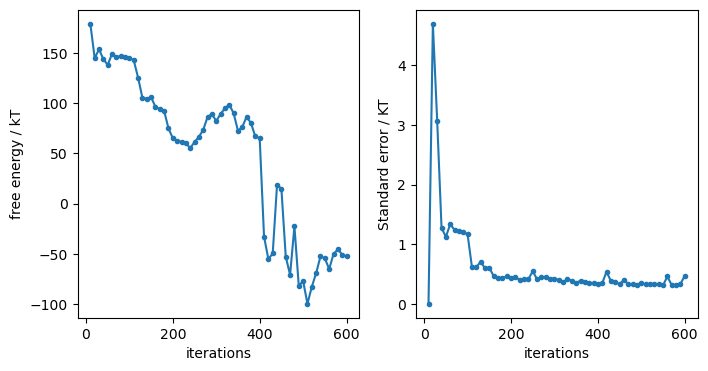

In [47]:
fig, axs = plt.subplots(1,2, figsize=(8,4))

ys = [free_energy, errors]
y_labels = ["free energy / kT", "Standard error / KT"]


for idx, ax in enumerate(axs.flatten()):
    ax.plot(iters, ys[idx], marker=".")
    ax.set_ylabel(y_labels[idx])
    ax.set_xlabel("iterations")

In [17]:
import os
os.environ["HDF5_USE_FILE_LOCKING"]="FALSE"

In [18]:
repex_file = netCDF4.Dataset("../repex.nc", 'a', version= 'NETCDF4')
repex_file

OSError: [Errno -101] NetCDF: HDF error: b'../repex.nc'

In [7]:
len(repex_file)

TypeError: object of type 'netCDF4._netCDF4.Dataset' has no len()